In [1]:
#run: pip install openquantumcomputing
import sys
sys.path.insert(0, '/home/franzf/OpenQuantumComputing/OpenQuantumComputing/')
from openquantumcomputing.QAOAExactCover import QAOAExactCover

In [2]:
from qiskit import *

import numpy as np
from tailassignment_loader import *

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

from tqdm import tqdm

In [3]:
instances = 6
flights   = 24
solutions = 3

path_to_examples = "tailassignment_samples/"

FR, CR, best_sol = load_FR_CR(path_to_examples + f'FRCR_{instances}_{flights}_{solutions}.txt')

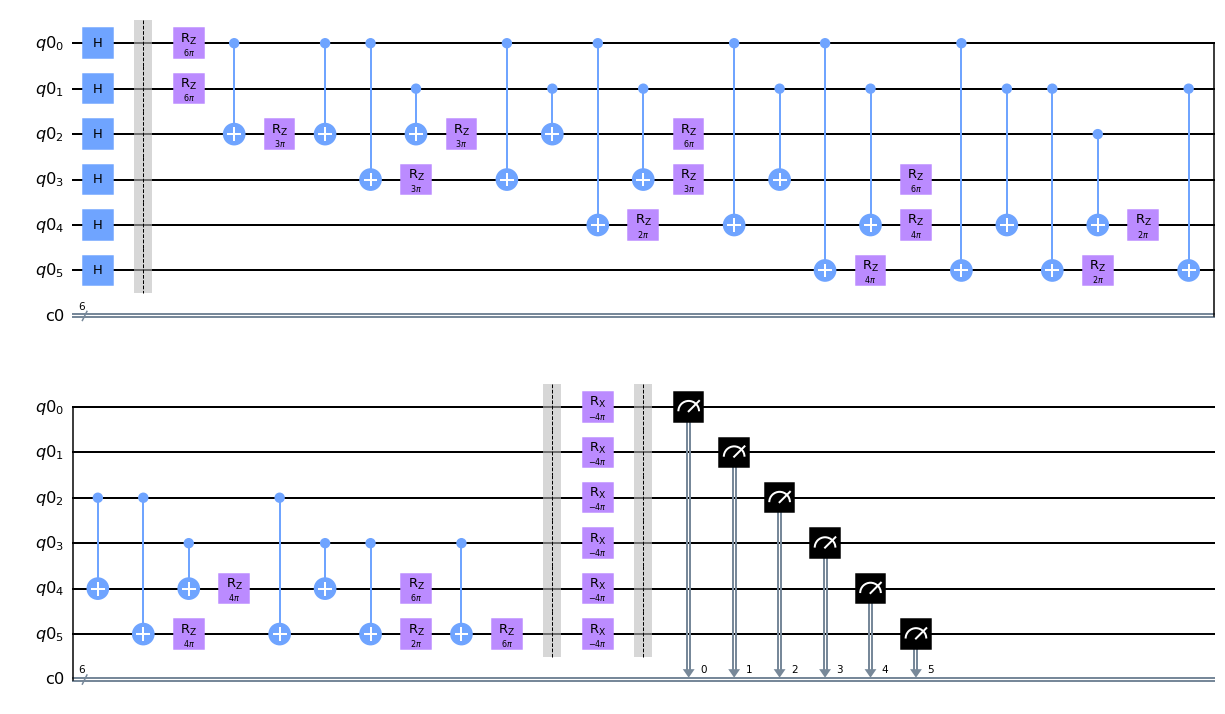

In [4]:
params={'FR': FR}
params['usebarrier']=True
qaoaec = QAOAExactCover(params=params)
qaoaec.createCircuit(np.array((np.pi,2*np.pi)),1).draw(output='mpl')

In [5]:
import itertools
print(FR)
nL=FR.shape[1]
print("solutions:")
costs=[]
for s in [''.join(i) for i in itertools.product('01', repeat =nL)]:
    tmp=-qaoaec.cost(s)
    costs.append(tmp)
    if tmp==0:
        print(s)

[[0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1.]
 [1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]]
solutions:
000011
001100
110000


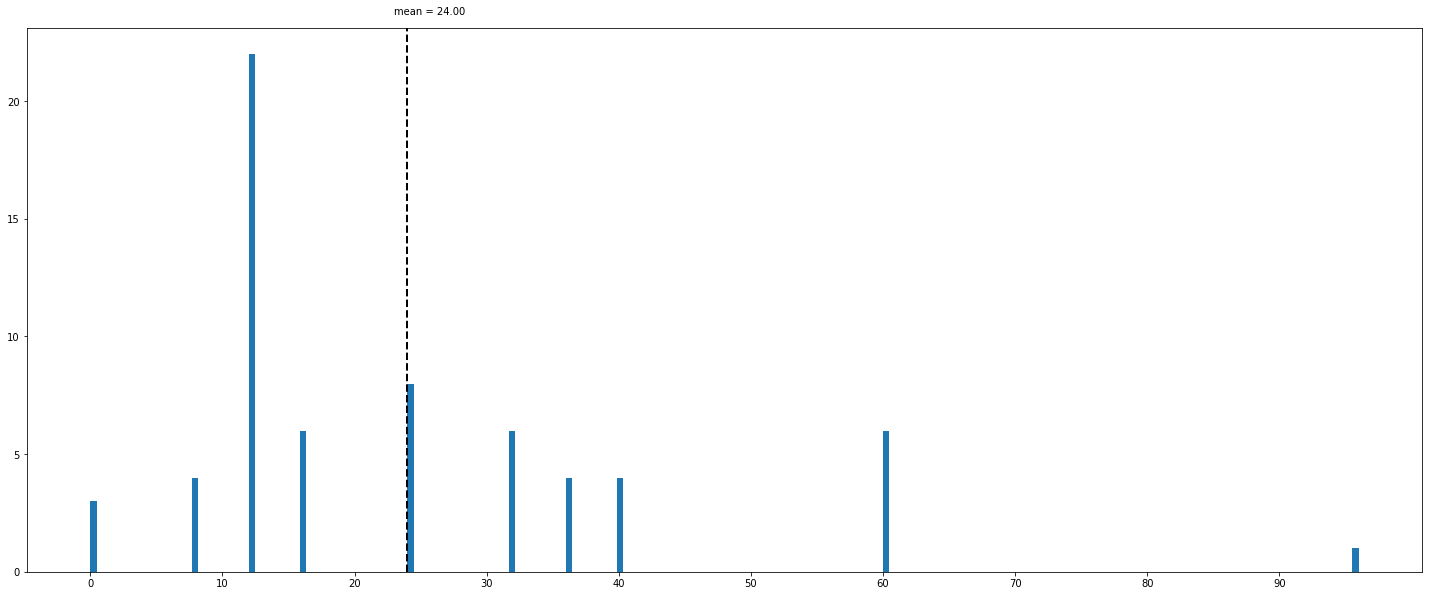

In [6]:
max_val=max(costs)

pl.figure(figsize=(25,10))
a=pl.hist(np.sort(costs), bins=200)
min_ylim, max_ylim = pl.ylim()
max_ylim *=1.025
mean=np.mean(costs)
pl.axvline(mean, color='k', linestyle='dashed', linewidth=2)
a=pl.text(mean-1, max_ylim, 'mean = {:.2f}'.format(mean))
a=pl.xticks(np.arange(0, max_val, step=10))

In [7]:
qasm_sim = Aer.get_backend('qasm_simulator')

In [8]:
qaoaec.sample_cost_landscape(qasm_sim, 1024, angles={"gamma": [0,np.pi,30], "beta": [0,np.pi/2,20]})

Calculating Energy landscape for depth p=1...
Calculating Energy landscape done


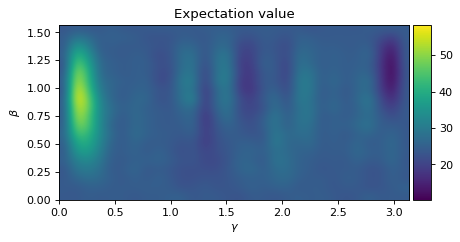

In [9]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoaec.E,interpolation='bicubic',origin='lower',extent=[0,np.pi,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

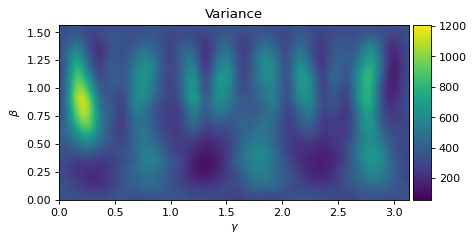

In [10]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Variance')
im = ax.imshow(qaoaec.Var,interpolation='bicubic',origin='lower',extent=[0,np.pi,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

In [11]:
maxdepth=10
for i in tqdm(range(maxdepth)):
    qaoaec.increase_depth(qasm_sim, 2*1024)

 10%|█         | 1/10 [00:01<00:10,  1.14s/it]

cost(depth= 1 )= 10.275390625


 20%|██        | 2/10 [00:02<00:11,  1.46s/it]

cost(depth= 2 )= 10.078125000000002


 30%|███       | 3/10 [00:06<00:16,  2.39s/it]

cost(depth= 3 )= 9.472656250000005


 40%|████      | 4/10 [00:11<00:20,  3.35s/it]

cost(depth= 4 )= 8.318359375000002


 50%|█████     | 5/10 [00:16<00:20,  4.04s/it]

cost(depth= 5 )= 8.542968749999998


 60%|██████    | 6/10 [00:23<00:20,  5.24s/it]

cost(depth= 6 )= 7.851562500000002


 70%|███████   | 7/10 [00:33<00:20,  6.79s/it]

cost(depth= 7 )= 6.76953125


 80%|████████  | 8/10 [00:43<00:15,  7.62s/it]

cost(depth= 8 )= 5.177734375


 90%|█████████ | 9/10 [00:54<00:08,  8.84s/it]

cost(depth= 9 )= 13.416015624999998


100%|██████████| 10/10 [01:09<00:00,  6.98s/it]

cost(depth= 10 )= 14.5


In [12]:
hist=qaoaec.hist(qaoaec.angles_hist['d10_final'], qasm_sim,1024)
bins={}
for key in hist:
    c=-qaoaec.cost(key)
    bins[c]=bins.get(c,0)
    bins[c]+=hist[key]
bins=dict(sorted(bins.items()))

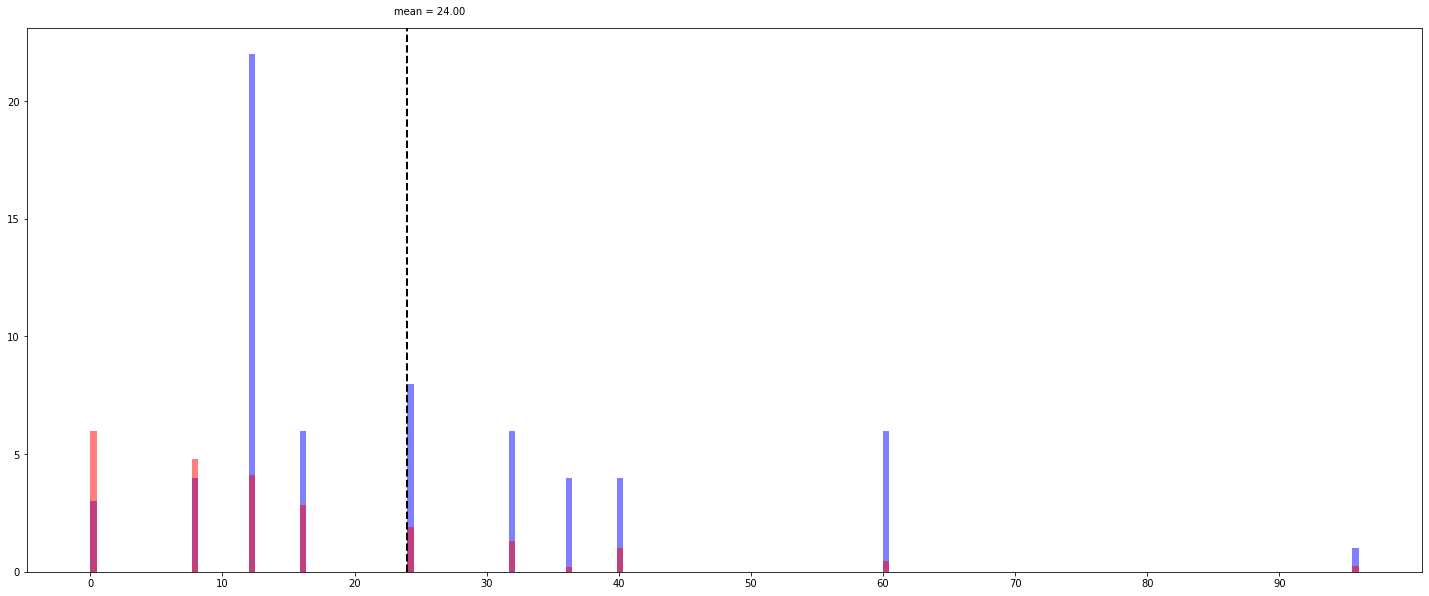

In [13]:
max_val=max(costs)

pl.figure(figsize=(25,10))
_=pl.hist(np.sort(costs), bins=200, alpha = 0.5, color= 'b')
w=np.array(list(bins.values()))
_=pl.hist(bins.keys(),bins=200,weights=w/max(w)*6, alpha = 0.5, color= 'r')
min_ylim, max_ylim = pl.ylim()
max_ylim *=1.025
mean=np.mean(costs)
pl.axvline(mean, color='k', linestyle='dashed', linewidth=2)
_=pl.text(mean-1, max_ylim, 'mean = {:.2f}'.format(mean))
_=pl.xticks(np.arange(0, max_val, step=10))

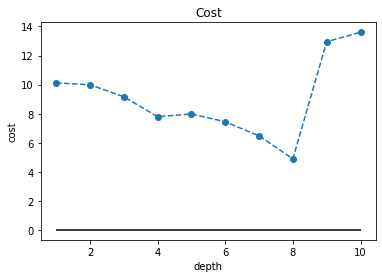

In [14]:
pl.plot(np.arange(1,maxdepth+1), np.array(list(qaoaec.costval.values())),'o--')
pl.hlines(0, 1,maxdepth, linestyles="solid", colors="black")
# pl.ylim(-0.01,1)
_=pl.title('Cost')
_=pl.ylabel('cost')
_=pl.xlabel('depth')

100%|██████████| 10/10 [00:00<00:00, 23.98it/s]


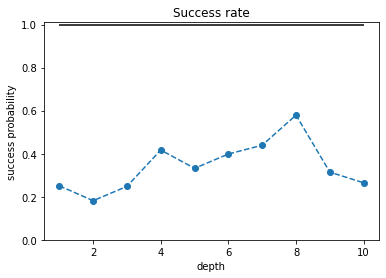

In [15]:
sp=np.zeros(maxdepth)
for i in tqdm(range(maxdepth)):
    sp[i]=qaoaec.successProbability(qaoaec.angles_hist['d'+str(i+1)+'_final'], qasm_sim,1024)
pl.plot(np.arange(1,maxdepth+1), sp,'o--')
pl.hlines(1, 1,maxdepth, linestyles="solid", colors="black")
pl.ylim(0,1.01)
_=pl.title('Success rate')
_=pl.ylabel('success probability')
_=pl.xlabel('depth')

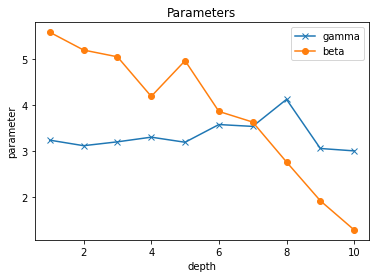

In [16]:
pl.plot(np.arange(1,maxdepth+1),qaoaec.angles_hist['d'+str(maxdepth)+'_final'][::2],"x-",label='gamma')
pl.plot(np.arange(1,maxdepth+1),qaoaec.angles_hist['d'+str(maxdepth)+'_final'][1::2],"o-",label='beta')

_=pl.title('Parameters')
_=pl.ylabel('parameter')
_=pl.xlabel('depth')
_=pl.legend()